# Data Exploratory Analysis
The following outlines the process I used to understand and analyze the dataset.

In [1]:
# The first step involves importing the libraries required for the process:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The graphics style selected is:
plt.style.use('ggplot')

In [2]:
# The following allows us to view all the columns of the dataset, regardless of its size:
pd.set_option('display.max_columns', None)

In [3]:
# Then the dataset is loaded as:
corn = pd.read_csv("C://Users/jober/Data_Projects/corn-yield-prediction/Dataset/corn_data.csv", sep=";", )

## Step 1: Understanding the data
This step give us a general sense of the dataset: 

In [4]:
corn.shape

(422, 22)

In [5]:
corn.head()

,County,Farmer,Education,Gender,Age bracket,Household size,Crop,Acreage,Fertilizer amount,Laborers,Yield,Power source,Water source,Main credit source,Crop insurance,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language,Latitude,Longitude
0,TAITA TAVETA,fmr_65,Certificate,Male,36-45,7,corn,2.00,50,2,300,Manual,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.46,38.35
1,TAITA TAVETA,fmr_77,Certificate,Male,36-45,7,corn,0.25,50,2,270,Manual,Rain,Credit groups,No,Yes,Radio,County Government,SMS text,Kiswahili,-3.31,38.40
2,TAITA TAVETA,fmr_89,Certificate,Male,36-45,7,corn,3.00,251,2,270,Manual,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.41,38.37
3,TAITA TAVETA,fmr_102,Certificate,Male,36-45,7,corn,1.50,300,3,200,Manual,Rain,Credit groups,No,Yes,Radio,County Government,SMS text,Kiswahili,-3.39,38.37
4,TAITA TAVETA,fmr_25,Certificate,Male,46-55,3,corn,NaN,50,2,180,Manual,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.39,38.33


In [6]:
corn.columns

Index(['County', 'Farmer', 'Education', 'Gender', 'Age bracket',
       'Household size', 'Crop', 'Acreage', 'Fertilizer amount', 'Laborers',
       'Yield', 'Power source', 'Water source', 'Main credit source',
       'Crop insurance', 'Farm records', 'Main advisory source',
       'Extension provider', 'Advisory format', 'Advisory language',
       'Latitude', 'Longitude'],
      dtype='object')

In [7]:
# Using the info() method, we can quickly identify the data type of each column and detect null values:"
corn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   County                422 non-null    object 
 1   Farmer                422 non-null    object 
 2   Education             396 non-null    object 
 3   Gender                422 non-null    object 
 4   Age bracket           422 non-null    object 
 5   Household size        422 non-null    int64  
 6   Crop                  422 non-null    object 
 7   Acreage               351 non-null    float64
 8   Fertilizer amount     422 non-null    int64  
 9   Laborers              422 non-null    int64  
 10  Yield                 422 non-null    int64  
 11  Power source          422 non-null    object 
 12  Water source          422 non-null    object 
 13  Main credit source    422 non-null    object 
 14  Crop insurance        422 non-null    object 
 15  Farm records          4

In [8]:
# The number of null values in the dataset is confirmed as:
corn.isna().sum()

County                   0
Farmer                   0
Education               26
Gender                   0
Age bracket              0
Household size           0
Crop                     0
Acreage                 71
Fertilizer amount        0
Laborers                 0
Yield                    0
Power source             0
Water source             0
Main credit source       0
Crop insurance           0
Farm records             0
Main advisory source     0
Extension provider       0
Advisory format          0
Advisory language        0
Latitude                 0
Longitude                0
dtype: int64

In [9]:
# The describe() function provides basic statistics for the numerical variables in the dataset:
corn.describe()

,Household size,Acreage,Fertilizer amount,Laborers,Yield,Latitude,Longitude
count,422.000000,351.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,4.263033,0.828063,65.189573,2.843602,232.604265,-3.417583,38.404455
std,1.706355,0.584884,65.754796,0.974348,135.376952,0.079007,0.094324
min,1.000000,0.250000,20.000000,2.000000,50.000000,-3.640000,38.270000
25%,3.000000,0.500000,25.000000,2.000000,100.000000,-3.490000,38.340000
50%,4.000000,0.500000,50.000000,3.000000,180.000000,-3.410000,38.370000
75%,5.000000,1.000000,75.000000,3.000000,330.000000,-3.360000,38.400000
max,9.000000,4.000000,500.000000,8.000000,600.000000,-3.250000,38.630000


## Step 2: Data preparation
Now that I have a general understanding of the data, some cleaning is needed before proceeding with further analysis.

In [10]:
# Checking for duplicates:
corn.duplicated().sum()

0

In [11]:
corn.loc[corn.duplicated(subset=['Farmer'])].shape

(0, 22)

In [12]:
# The column 'Farmer' indicates a unique record for each of the 422 platantion leader's.
corn['Farmer'].value_counts()

Farmer
fmr_65     1
fmr_219    1
fmr_72     1
fmr_71     1
fmr_368    1
          ..
fmr_410    1
fmr_371    1
fmr_274    1
fmr_254    1
fmr_200    1
Name: count, Length: 422, dtype: int64

In [13]:
# Then there are no registries duplicated.

In [14]:
# In addition, the following columns are not useful for creating a predictive model because they return the same value for all rows, as shown below:
cols = ['County', 'Crop', 'Power source', 'Water source','Crop insurance']
for c in cols:
    print(corn[c].value_counts())

County
TAITA TAVETA    422
Name: count, dtype: int64
Crop
corn    422
Name: count, dtype: int64
Power source
Manual    422
Name: count, dtype: int64
Water source
Rain    422
Name: count, dtype: int64
Crop insurance
No    422
Name: count, dtype: int64


In [15]:
# Additionally, the columns 'Latitude' and 'Longitude' do not provide value due to their low variance within the analyzed county.

In [16]:
# Then, our subset selected for analysis is:
corn_subset = corn[['Education', 'Gender', 'Age bracket',
                    'Household size', 'Acreage', 'Fertilizer amount', 'Laborers',
                    'Yield', 'Main credit source', 'Farm records', 
                    'Main advisory source', 'Extension provider', 'Advisory format', 
                    'Advisory language']]
corn_subset.head()

,Education,Gender,Age bracket,Household size,Acreage,Fertilizer amount,Laborers,Yield,Main credit source,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language
0,Certificate,Male,36-45,7,2.00,50,2,300,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular
1,Certificate,Male,36-45,7,0.25,50,2,270,Credit groups,Yes,Radio,County Government,SMS text,Kiswahili
2,Certificate,Male,36-45,7,3.00,251,2,270,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular
3,Certificate,Male,36-45,7,1.50,300,3,200,Credit groups,Yes,Radio,County Government,SMS text,Kiswahili
4,Certificate,Male,46-55,3,NaN,50,2,180,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular


In [17]:
# Column names in our refined dataframe are converted to lowercase, and spaces are removed for consistency and usability:
corn_subset.columns = [name.lower() for name in corn_subset.columns]
corn_subset.columns = [name.replace(" ","_") for name in corn_subset.columns]

In [18]:
corn_subset.head()

,education,gender,age_bracket,household_size,acreage,fertilizer_amount,laborers,yield,main_credit_source,farm_records,main_advisory_source,extension_provider,advisory_format,advisory_language
0,Certificate,Male,36-45,7,2.00,50,2,300,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular
1,Certificate,Male,36-45,7,0.25,50,2,270,Credit groups,Yes,Radio,County Government,SMS text,Kiswahili
2,Certificate,Male,36-45,7,3.00,251,2,270,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular
3,Certificate,Male,36-45,7,1.50,300,3,200,Credit groups,Yes,Radio,County Government,SMS text,Kiswahili
4,Certificate,Male,46-55,3,NaN,50,2,180,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular


In [19]:
# Then, let's see the null values
corn_subset.isna().sum()

education               26
gender                   0
age_bracket              0
household_size           0
acreage                 71
fertilizer_amount        0
laborers                 0
yield                    0
main_credit_source       0
farm_records             0
main_advisory_source     0
extension_provider       0
advisory_format          0
advisory_language        0
dtype: int64

In [20]:
# The null values in the 'acreage' column are:
corn_subset[corn_subset['acreage'].isna()]

,education,gender,age_bracket,household_size,acreage,fertilizer_amount,laborers,yield,main_credit_source,farm_records,main_advisory_source,extension_provider,advisory_format,advisory_language
4,Certificate,Male,46-55,3,NaN,50,2,180,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular
13,Certificate,Male,46-55,5,NaN,20,3,135,Savings,No,Extension services,County Government,SMS text,English
16,Diploma,Female,46-55,5,NaN,25,2,160,Credit groups,Yes,Extension services,County Government,Phone Calls,Kiswahili
20,Diploma,Male,56-65,1,NaN,20,4,90,Credit groups,Yes,Radio,County Government,SMS text,English
23,Diploma,Male,56-65,1,NaN,48,2,75,Credit groups,No,Radio,County Government,Phone Calls,Kiswahili
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,Secondary,Female,56-65,3,NaN,40,2,70,Credit groups,No,Radio,Private Provider,Phone Calls,Kiswahili
392,Secondary,Female,46-55,4,NaN,31,3,50,Credit groups,No,Radio,Private Provider,Phone Calls,English
399,NaN,Female,18-35,6,NaN,20,2,450,Credit groups,No,Public gatherings,County Government,SMS text,English
409,NaN,Female,36-45,6,NaN,50,2,270,Credit groups,No,Extension services,County Government,Phone Calls,Kiswahili


In [21]:
# The 71 entries lacking records of the amount of cultivated land are not useful for our objective. 
# Those registries represent:
missing_land = corn_subset['acreage'].isna().sum()
amount_ml = (missing_land / corn.shape[0])*100
print(f'The percentage of registries with missing values of cultivated land represent {amount_ml}')

The percentage of registries with missing values of cultivated land represent 16.824644549763033


While removing a large number of missing values is generally not advisable, the lack of access to the research team for clarification and the limited usefulness of this data for our model, these rows will be removed from the dataframe.

In [22]:
# The resulting dataframe is:
filter = corn_subset['acreage'].isna()
corn_subset = corn_subset[~filter]

In [23]:
# The null values in the 'education' columns are:
corn_subset[corn_subset['education'].isna()].shape

(23, 14)

It makes sense that farmers in a developing country might have little to no formal education. Therefore, we can reasonably infer that many of them have not achieved any formal academic qualifications.

In [31]:
# We populate the missing values in the education column with "No educated":
corn_subset.loc[corn_subset['education'].isna()] = corn_subset.loc[corn_subset['education'].isna()].fillna('No educated')

In [28]:
corn_subset['education'].value_counts()

education
Primary        195
Secondary      108
No educated     23
Certificate     13
Diploma          7
Degree           5
Name: count, dtype: int64

In [33]:
# Finally, our cleaned dataset does not contains missing values:
corn_subset.isna().sum()

education               0
gender                  0
age_bracket             0
household_size          0
acreage                 0
fertilizer_amount       0
laborers                0
yield                   0
main_credit_source      0
farm_records            0
main_advisory_source    0
extension_provider      0
advisory_format         0
advisory_language       0
dtype: int64

In [36]:
# The main statistics for out clean dataset are:
corn_subset.describe(include='all')

,education,gender,age_bracket,household_size,acreage,fertilizer_amount,laborers,yield,main_credit_source,farm_records,main_advisory_source,extension_provider,advisory_format,advisory_language
count,351,351,351,351.000000,351.000000,351.000000,351.000000,351.000000,351,351,351,351,351,351
unique,6,2,5,NaN,NaN,NaN,NaN,NaN,3,2,5,4,2,3
top,Primary,Female,36-45,NaN,NaN,NaN,NaN,NaN,Credit groups,No,Radio,County Government,Phone Calls,Kiswahili
freq,195,249,115,NaN,NaN,NaN,NaN,NaN,266,254,153,203,237,274
mean,NaN,NaN,NaN,4.319088,0.828063,63.720798,2.814815,243.618234,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.685452,0.584884,65.145346,0.921122,136.714560,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,0.250000,20.000000,2.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.000000,0.500000,25.000000,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,4.000000,0.500000,50.000000,3.000000,200.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,6.000000,1.000000,75.000000,3.000000,360.000000,NaN,NaN,NaN,NaN,NaN,NaN


## Step 3: Feature understanding

Now, it is important to understand how the selected variables behave:

<Axes: xlabel='education', ylabel='yield'>

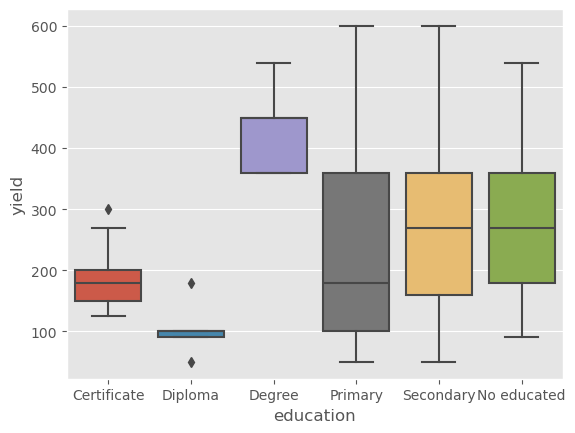

In [ ]:
# The education variable behave as:
sns.boxplot(x=corn_subset['education'], y=corn_subset['yield'])

In [ ]:
# Importance of the feature 'education'

Text(0, 0.5, 'Count of farmer')

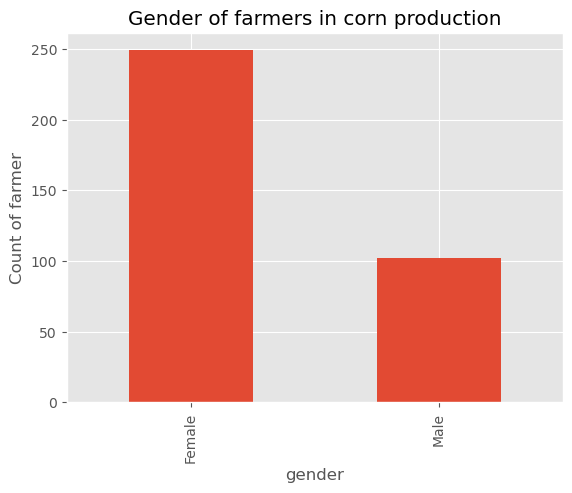

In [44]:
# The 'gender' variable behave as:
ax = corn_subset['gender'].value_counts() \
    .plot(kind='bar',title='Gender of farmers in corn production')
ax.set_ylabel('Count of farmer')

Text(0, 0.5, 'Count of farmer')

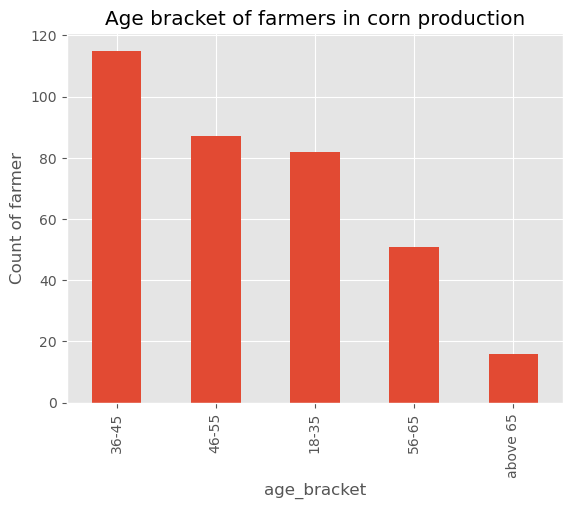

In [46]:
# The 'age_bracket' variable behave as:
ax = corn_subset['age_bracket'].value_counts() \
    .plot(kind='bar',title='Age bracket of farmers in corn production')
ax.set_ylabel('Count of farmer')

## Step 4: Model identification
The model requested is yield centered. 

- feature creation
